# P2: Project proposal and initial analyses
When you are done with Homework H1, you will continue to work on the next project milestone. In Milestone P2, together with your team members, you will agree on and refine your project proposal. Your first task is to select a project. Even though we provide the datasets for you to use, at this juncture, it is your responsibility to perform initial analyses and verify that what you propose is feasible given the data (including any additional data you might bring in yourself), which is crucial for the success of the project.

The goal of this milestone is to intimately acquaint yourself with the data, preprocess it, and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you have clear project goals.

When describing the relevant aspects of the data, and any other datasets you may intend to use, you should in particular show (non-exhaustive list):

- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these steps have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project. We will also evaluate this milestone according to how clear, reasonable, and well thought-through the project idea is. Please use the second milestone to really check with us that everything is in order with your project (idea, feasibility, etc.) before you advance too much with the final Milestone P3! There will be project office hours dedicated to helping you.

You will work in a public GitHub repository dedicated to your project, which can be created by following this link. The repository will automatically be named ada-2023-project-<your_team_name>. By the Milestone P2 deadline, each team should have a single public GitHub repo under the epfl-ada GitHub organization, containing the project proposal and initial analysis code.

## P2 deliverable (done as a team): GitHub repository with the following:

- Readme.md file containing the detailed project proposal (up to 1000 words). Your README.md should contain:
  - Title
  - bstract: A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?
  - Research Questions: A list of research questions you would like to address during the project.
  - Proposed additional datasets (if any): List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible.
  - Methods
  - Proposed timeline
  - Organization within the team: A list of internal milestones up until project Milestone P3.
  - Questions for TAs (optional): Add here any questions you have for us related to the proposed project.
- Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.


In [1]:
import pandas as pd
import datetime as dt

In [2]:
# Import the data with the correct format
data_folder = '../data/'
columns=['hashedIpAddress','timestamp','durationInSec','path','rating']

paths_dataset = data_folder+'wikispeedia_paths-and-graph/paths_finished.tsv'
df = pd.read_csv(paths_dataset,comment='#',sep='\t',names=columns)

In [3]:
# change unix timestamp code to human readable
df['timestamp'] = df['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))

In [4]:
df

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,2013-11-22 04:42:52,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,2011-02-27 07:42:47,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [5]:
paths = df.path.apply(lambda x: x.split(';')).copy()
paths_filtered = paths.apply(lambda x: x[0] +' -> '+ x[len(x)-1]).copy()
print(paths_filtered.unique())

['14th_century -> African_slave_trade' '14th_century -> Greece'
 '14th_century -> John_F._Kennedy' ... 'Yagan -> U.S._Open_%28tennis%29'
 'Yarralumla%2C_Australian_Capital_Territory -> Abraham_Lincoln'
 'Ziad_Jarrah -> Jew']


In [6]:
game_reps=paths_filtered.value_counts().head(10)
game_reps

path
Asteroid -> Viking           1043
Brain -> Telephone           1040
Theatre -> Zebra              905
Pyramid -> Bean               642
Batman -> Wood                148
Bird -> Great_white_shark     138
Batman -> The_Holocaust       119
Bird -> Adolf_Hitler          107
Beer -> Sun                    99
Batman -> Banana               69
Name: count, dtype: int64

<Axes: >

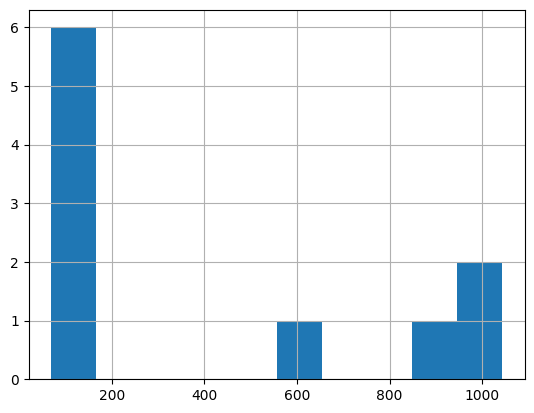

In [7]:
game_reps.hist()